In [58]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import scipy.stats as stats

In [60]:
plt.rcParams['figure.figsize'] = (15, 10)

# Генерируем данные

Нормальная выборка

In [61]:
norm_sample = stats.norm.rvs(size=10000)

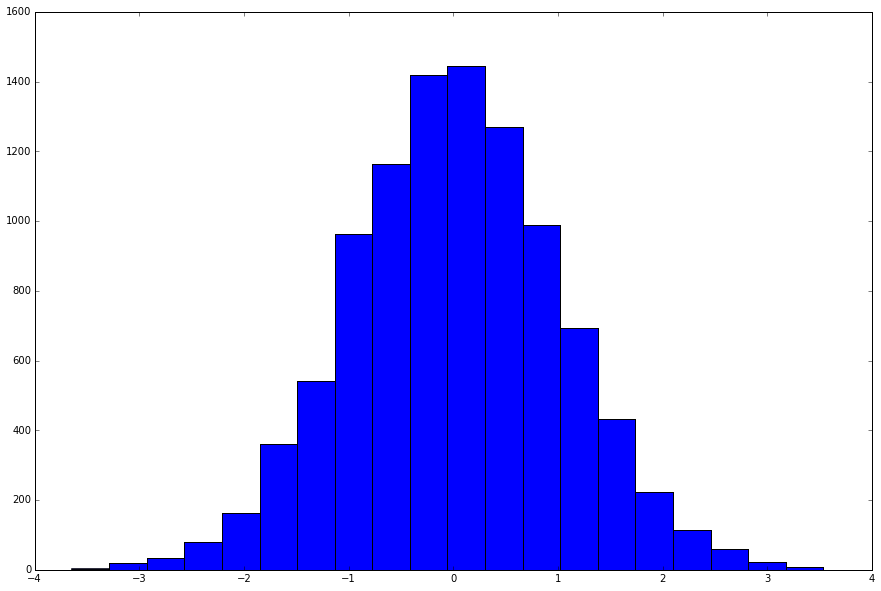

In [62]:
plt.hist(norm_sample, bins=20);

Скошенная выборка

In [150]:
skewed_sample = stats.norm.rvs(-0.25, size=10000) + stats.expon.rvs(size=10000) * 0.25

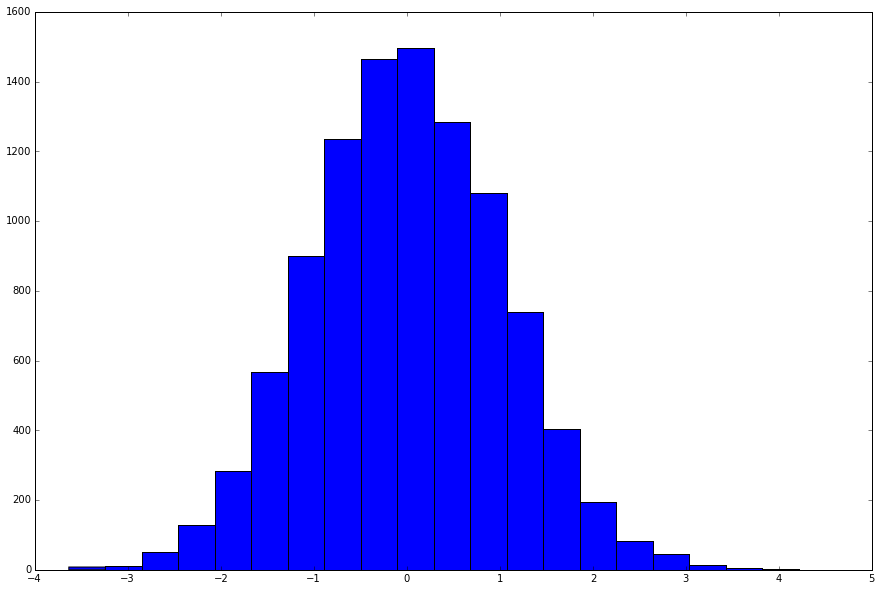

In [151]:
plt.hist(skewed_sample, bins=20);

Стьюдент

In [152]:
t_sample = stats.t.rvs(40, size=10000)

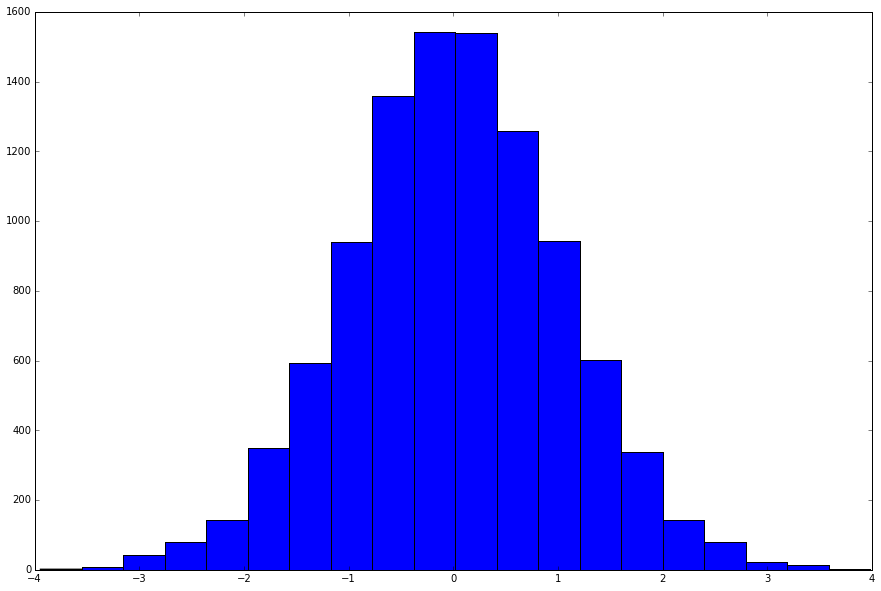

In [153]:
plt.hist(t_sample, bins=20);

# Визуальные методы проверки нормальности

Нормальная выборка

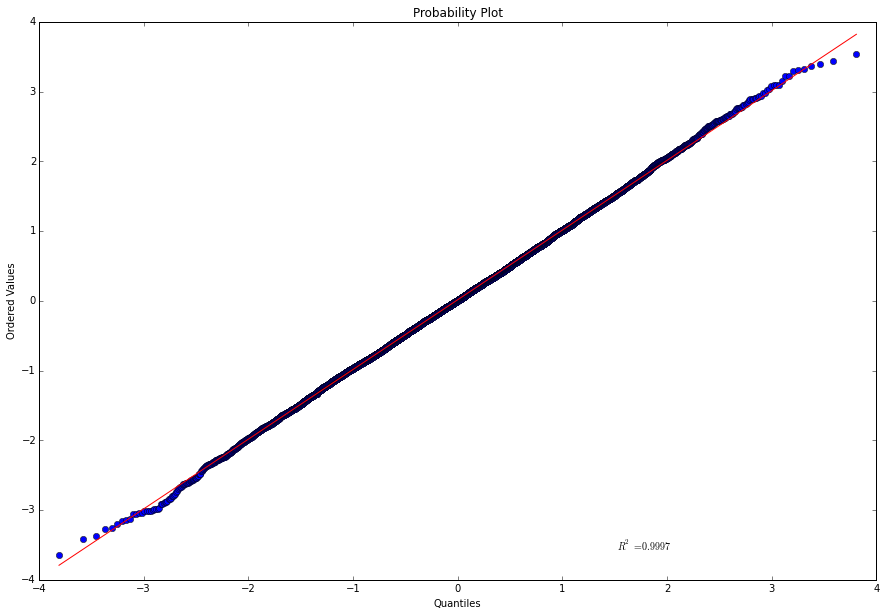

In [154]:
stats.probplot(norm_sample, plot=plt);

Скошенная выборка

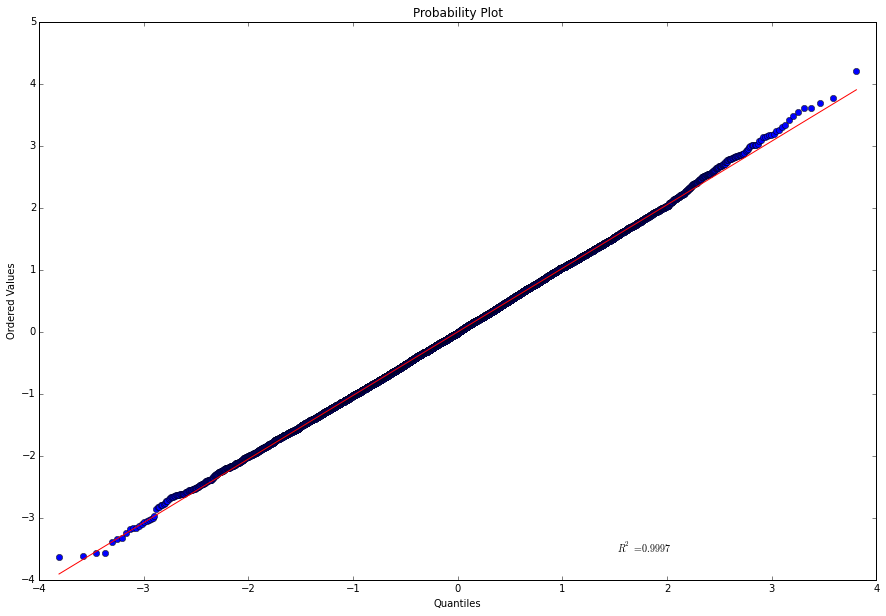

In [155]:
stats.probplot(skewed_sample, plot=plt);

Стьюдент

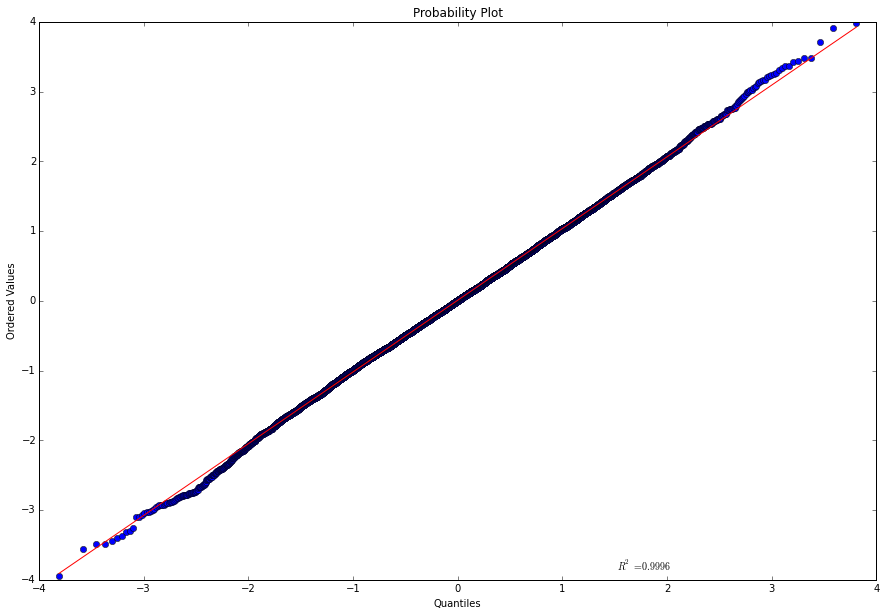

In [156]:
stats.probplot(t_sample, plot=plt);

# Критерии согласия

Тест Колмогорова-Смирнова

In [157]:
stats.kstest(norm_sample, stats.norm.cdf)

KstestResult(statistic=0.0099295650249734413, pvalue=0.27762663169530089)

In [158]:
stats.kstest(skewed_sample, stats.norm.cdf)

KstestResult(statistic=0.011455166406623085, pvalue=0.14490883854870815)

In [159]:
stats.kstest(t_sample, stats.norm.cdf)

KstestResult(statistic=0.0086690100310603535, pvalue=0.4400130856140419)

А сработает ли для дискретных распределений?

In [160]:
binom = stats.binom.rvs(1000, 0.5, size=10000)

In [161]:
stats.kstest(binom, lambda x: stats.binom.cdf(x, 1000, 0.5))

KstestResult(statistic=0.030287490911158288, pvalue=2.153696806870712e-08)

Тест Андерсона-Дарлинга

In [162]:
stats.anderson(norm_sample, 'norm')

AndersonResult(statistic=0.6342655672087858, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [163]:
stats.anderson(skewed_sample, 'norm')

AndersonResult(statistic=0.58028894657218189, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [164]:
stats.anderson(t_sample, 'norm')

AndersonResult(statistic=0.91602370902182884, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Тест Шапиро-Уилка

In [165]:
stats.shapiro(norm_sample)

(0.9997064471244812, 0.1547536998987198)

In [166]:
stats.shapiro(skewed_sample)

(0.9996435046195984, 0.06225110590457916)

In [167]:
stats.shapiro(t_sample)

(0.9995681047439575, 0.02019825391471386)

Как быстро провести тест Лилиефорса?

In [168]:
#ответ
stats.kstest((skewed_sample - skewed_sample.mean()) / skewed_sample.std(), stats.norm.cdf)

KstestResult(statistic=0.0068584411951223001, pvalue=0.73465350573922428)

pvalue некорректное, нужно взять данные из распределения Лилиефорса

Тест Харке-Бера

In [169]:
stats.normaltest(norm_sample)

NormaltestResult(statistic=3.2025858528858548, pvalue=0.20163564932614525)

In [170]:
stats.normaltest(skewed_sample)

NormaltestResult(statistic=5.3131519088633343, pvalue=0.070188138151287313)

In [171]:
stats.normaltest(t_sample)

NormaltestResult(statistic=8.274007748016631, pvalue=0.015970629913090666)

Почему это на самом деле не совсем тест Харке-Бера?

In [149]:
#потому что в stats.normaltest просто берется сумма kurtosis и skewness, без коэффициентов

# Bootstrap

В скошенной выборке есть смещение, попробуем оценить дисперсию его оценки с помощью бутстрапа:

In [172]:
bootstrap = np.random.choice(skewed_sample, size=(15000, 100))

In [173]:
skewed_sample.mean(), bootstrap.mean(axis=0).std()

(-0.0013743995497202505, 0.0073388024748009583)

Чуть более сложный пример: оценить доверительный интервал sin(a), где x ~ N(a, 1)

In [174]:
norm_sample_shifted = stats.norm.rvs(10, size=100)

In [175]:
bootstrap_shifted = np.random.choice(norm_sample_shifted, size=(15000, 100))

In [176]:
np.percentile(np.sin(bootstrap_shifted.mean(axis=0)), [0.05, 0.95])

array([-0.57004911, -0.56996983])

Приблизительно $sin(\overline{x}) \sim N(sin(a), \frac{cos^2(a)}{n})$, поэтому теоретический асимптотический доверительный интервал равен

In [177]:
(
    np.sin(norm_sample_shifted.mean()) - 2 * np.cos(norm_sample_shifted.mean()) ** 2 / len(norm_sample_shifted),
    np.sin(norm_sample_shifted.mean()) + 2 * np.cos(norm_sample_shifted.mean()) ** 2 / len(norm_sample_shifted),
)

(-0.57184707496184617, -0.54430503017997134)

Получим оценку с помощью бутстрапа:

In [178]:
(
    np.sin(norm_sample_shifted.mean()) - 2 * np.sin(bootstrap_shifted.mean(axis=0)).std(),
    np.sin(norm_sample_shifted.mean()) + 2 * np.sin(bootstrap_shifted.mean(axis=0)).std(),
)

(-0.56890570160207832, -0.54724640353973919)

Бутстрап ведет себя примерно также